   
# Human Activity Recognition With Smartphones 

## Table Of Content

- 1. Problem Statement
- 2. Data Loading & Description
- 3. Exploratory Data Analysis (EDA)
    - 3.1 Features Present in the Dataset
    - 3.2 Data Preprocessing
    - 3.3 Distribution of Labels
    - 3.4 Distribution of data provided by each user
    - 3.5 Activity Exploration
        - 3.5.1 Visualizations for Stationary and Moving activities
        - 3.5.2 Which Sensoris more important For Classifing Participants By Activity
        - 3.5.3 Visualisations for Magnitude of Acceleration and Angle Gravity with X & Y-Axis</br>
        - 3.5.4 Are The Activities Separable?
    - 3.6 Participant Exploration
        - 3.6.1 The Participants Visualization
        - 3.6.2 How Long Does The Participant Walk?
        - 3.6.3 How Long Does The Participant Use The Staircase?
        - 3.6.4 How Much Does The Up-/Downstairs Ratio Vary?
- 4. EDA Conclusions
- 5. Model Building & Evaluation
    - 5.1 Logistic Regression with Grid Search
    - 5.2 Linear SVC with Grid Search
    - 5.3 Kernel SVM with Grid Search
    - 5.4 Decision Tree with Grid Search
    - 5.5 Random Forest Classifier with Grid Search
    - 5.6 Model Comparision
- 6. Conclusions
- 7. Actionable Insights


## 1.1 Problem Statement

__The Human Activity Recognition__ database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to __classify activities into one of the six activities performed__.


## 2. Data Loading 

In [ ]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

##  3. Exploratory Data Analysis
    
__"Without domain knowledge EDA has no meaning, without EDA a problem has no soul."__

#### Check the shape of the datasets

In [3]:
print('Shape of Train dataframe:\t{}'.format(train_df.shape))
print('Shape of Test dataframe:\t{}'.format(test_df.shape))

Shape of Train dataframe:	(7352, 563)
Shape of Test dataframe:	(2947, 563)


#### Combine both the dataframes

In [3]:
# Combine boths dataframes
train_df['Data'] = 'Train'
test_df['Data'] = 'Test'
HAR_df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)
HAR_df['subject'] = '#' + HAR_df['subject'].astype(str)

#### Check the columns present in the dataset

In [8]:
HAR_df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity',
       'Data'],
      dtype='object', length=564)

In [6]:
HAR_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Data
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,#1,STANDING,Train
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,#1,STANDING,Train
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,#1,STANDING,Train
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,#1,STANDING,Train
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,#1,STANDING,Train


The directors of the study created an incredible number of features from the two sensors.

### 3.1. Features Present in the Dataset

The features seem to have a main name and some information on how they have been computed attached. Grouping the main names will reduce the dimensions for the first impression.

In [7]:
# Group and count main names of columns
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in train_df.columns]), orient='index').rename(columns={0:'count'}).sort_values('count', ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


Mainly there are 'acceleration' and 'gyroscope' features. A few 'gravity' features are there as well.<br/>

Impressive how many features there are in regard of the limited number of sensors used.

In [8]:
HAR_df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,0.126708,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.245443,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.019481,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,0.136245,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,0.288960,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We see that the min = -1 and the max = +1. so no need for scaling.

### 3.2. Data Pre-processing

#### Checking for null values in the dataset

In [9]:
# Get null values and dataframe information
print("Null values present in Dataframe: {}\n".format(HAR_df.isna().sum().sum()))
HAR_df.info()

Null values present in Dataframe: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 564 entries, tBodyAcc-mean()-X to Data
dtypes: float64(561), object(3)
memory usage: 44.3+ MB


#### Checking for duplicates

In [10]:
print('Number of duplicates in the dataset: {}'.format(sum(HAR_df.duplicated())))

Number of duplicates in the dataset: 0


- Except from the label and the newly created 'Subject' feature, there is only numerical data. <br/>
- Fortunately there are __No Missing values__ and __No Duplicates__.

### Changing feature names

Let's change the feature names for user convenience to further analysis.

In [4]:
columns = HAR_df.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train_df.columns = columns
test_df.columns = columns

test_df.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'Data'],
      dtype='object', length=564)

__Save these dataframes in csv files__

In [5]:
train_df.to_csv('kavita.kusagur@yahoo.com-ML_intermediate_project/Data/HAR/train.csv', index=False)
test_df.to_csv('kavita.kusagur@yahoo.com-ML_intermediate_project/Data/HAR/test.csv', index=False)

### 3.3. Distribution of Labels
One of the key things when working with data is to ensure with __data imbalance__ check (i.e. whether all classes are of approximately equal size or not). This is essential so that the machine learning algorithm is not biased towards any one class.

In [6]:
# Create label
label = HAR_df.pop('Activity')

In [14]:
# Activity Labels
print("Activity Labels :  ", label.unique())

Activity Labels :   ['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


Now, let's check the __Activity Label Distribution__

In [7]:
# Plotting data
label_counts = label.value_counts()

# Get colors
n = label_counts.shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Create plot
data = go.Bar(x = label_counts.index,
              y = label_counts,
              marker = dict(color = colors))

layout = go.Layout(title = 'Smartphone Activity Label Distribution',
                   xaxis = dict(title = 'Activity'),
                   yaxis = dict(title = 'Count'))

fig = go.Figure(data=[data], layout=layout)
iplot(fig)

- Our data is well balanced (almost) & will prevent bias.

### 3.4. Distribution of data provided by each Participant

Let's check the __Distribution of data provided by each Participant__

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

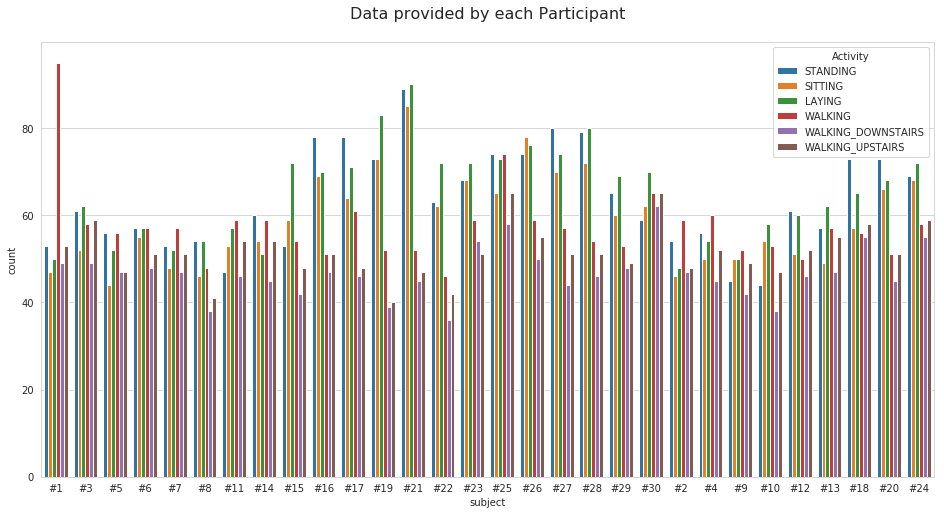

In [17]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each Participant\n', fontsize=16)
sns.countplot(x='subject', hue=label, data = HAR_df)
plt.show()

- We have got almost same number of reading from all the subjects.

#### Observations :

- Although there are fluctuations in the label counts, the labels are quite __equally distributed (almost well Balanced)__.
 <br/>We can see that the share of each activity is almost equal. The dataset is very well formed and can be used directly.
- Assuming the participants had to walk the same number of stairs upwards as well as downwards and knowing the smartphones had a constant sampling rate, there should be the same amount of datapoints for walking upstairs and downstairs. 
- Disregarding the possibility of flawed data, the participants seem to __walk roughly 10% faster downwards__.

### 3.5. Activity Exploration


__1. Featuring Engineering from Domain Knowledge__<br/>
- __Static and Dynamic Activities__

        - In static activities (SITTING, STANDING, LAYING) motion information will not be very useful.
        - In the dynamic activities (WALKING, WALKING UPSTAIRS, WALKING DOWNSTAIRS) motion info will be significant.

__2. Stationary and Moving activities are completely different__

#### 3.5.1. Visualizations for Stationary & Moving Activities

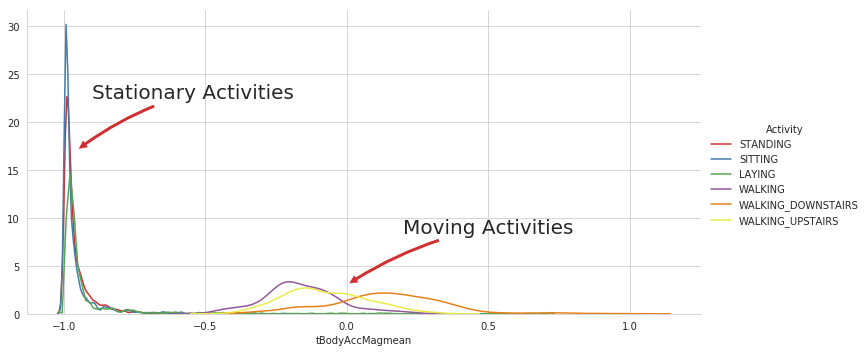

In [18]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train_df, hue='Activity', height=5, aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

Let's plot visualisations for __Stationary and Moving activities__ seperately.

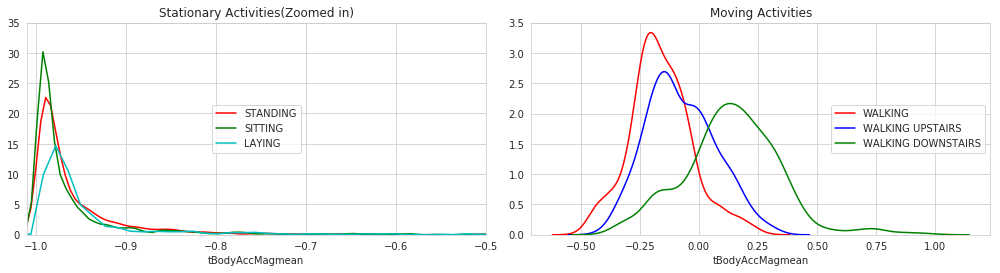

In [19]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train_df[train_df['Activity']=="STANDING"]
df2 = train_df[train_df['Activity']=="SITTING"]
df3 = train_df[train_df['Activity']=="LAYING"]
df4 = train_df[train_df['Activity']=="WALKING"]
df5 = train_df[train_df['Activity']=="WALKING_UPSTAIRS"]
df6 = train_df[train_df['Activity']=="WALKING_DOWNSTAIRS"]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df1['tBodyAccMagmean'],color = 'r',hist = False, label = 'STANDING')
sns.distplot(df2['tBodyAccMagmean'],color = 'g',hist = False,label = 'SITTING')
sns.distplot(df3['tBodyAccMagmean'],color = 'c',hist = False, label = 'LAYING')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df4['tBodyAccMagmean'],color = 'red',hist = False, label = 'WALKING')
sns.distplot(df5['tBodyAccMagmean'],color = 'blue',hist = False,label = 'WALKING UPSTAIRS')
sns.distplot(df6['tBodyAccMagmean'],color = 'green',hist = False, label = 'WALKING DOWNSTAIRS')
plt.legend(loc='center right')

plt.tight_layout()
plt.show()


#### 3.5.2. Sensor Importance For Classifing Participants By Activity


We can check the share of each feature by plotting a bar graph of each sensor type. 
Since there are so many features I am going to __group them by their sensor (accelerometer = Acc, gyroscope = Gyro)__

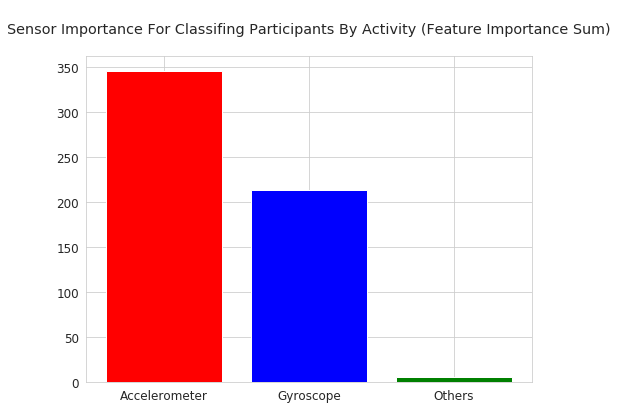

In [20]:
# Count for each type
Acc = 0
Gyro = 0
Others = 0
for column in HAR_df.columns:
    if 'Acc' in str(column):
        Acc += 1
    elif 'Gyro' in str(column):
        Gyro += 1
    else:
        Others += 1

# Show bar plot for the three types
plt.rcParams.update({'figure.figsize': [8, 6], 'font.size': 12})
plt.title('\nSensor Importance For Classifing Participants By Activity (Feature Importance Sum)\n')
plt.bar(['Accelerometer', 'Gyroscope', 'Others'], [Acc, Gyro, Others], color = ('r', 'b', 'g'))
plt.show()

#### Observations:

- __Accelerometer__ constitutes the __maximum features__, followed by Gyroscope. Other features are very less.
- Both sensors are important for classification and refraining from using both sensors will be a drawback for the quality of the model.

Next, will explore more on Activity regarding Accelerometer feature in futher analysis.

####  3.5.3. Visualizations for Magnitude of Acceleration and Angle of Gravity with X & Y-axis<br>
    
__Magnitude of an acceleration can saperate it well__

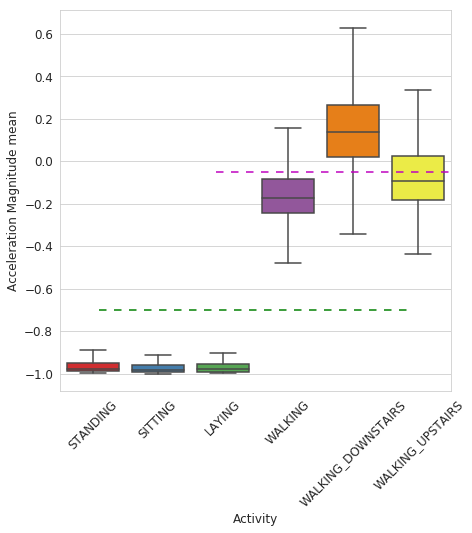

In [21]:
plt.figure(figsize=(7,7))
sns.boxplot(x='Activity', y='tBodyAccMagmean',data=train_df, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=45)
plt.show()

#### Observations :

- If tAccMean is < -0.8 then, the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then, the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then, the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

__Position of GravityAccelerationComponants also matters__

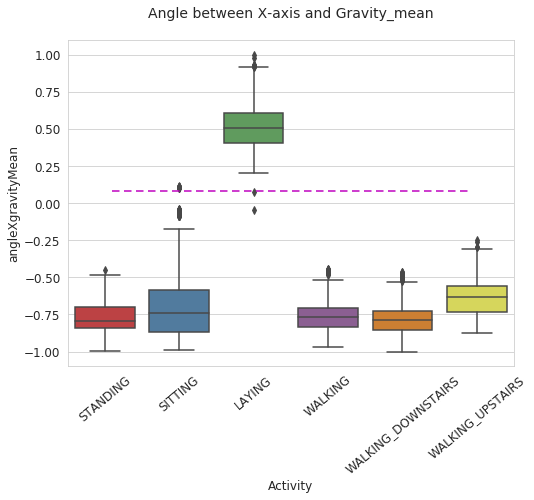

In [22]:
sns.boxplot(x='Activity', y='angleXgravityMean', data=train_df)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean\n', fontsize=14)
plt.xticks(rotation = 40)
plt.show()

#### Observations:
- If angleX, gravityMean > 0 then Activity is Laying.
- We can classify all datapoints belonging to Laying activity with just a single if else statement.

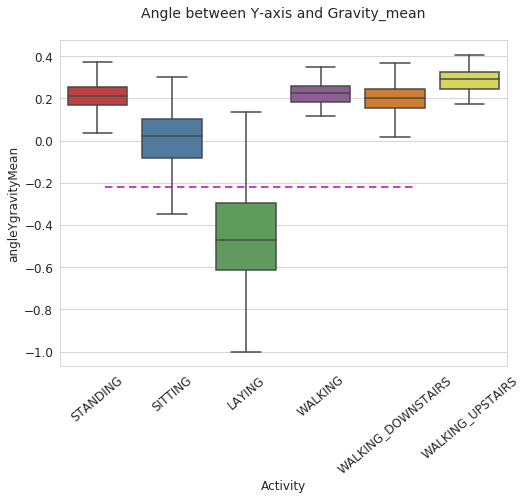

In [23]:
sns.boxplot(x='Activity', y='angleYgravityMean', data = train_df, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean\n', fontsize=14)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

#### 3.5.4. Are The Activities Separable?

The dataset is geared towards classifying the activity of the participant. <br/>
Let us investigate the separability of the classes using __t-SNE__ (which maps the high dimensional data to some low dimensions for us humans to visualize) with PCA.

In [24]:
# Create datasets
tsne_data = HAR_df.copy()
data_data = tsne_data.pop('Data')
subject_data = tsne_data.pop('subject')

# Scale data
scl = StandardScaler()
tsne_data = scl.fit_transform(tsne_data)

# Reduce dimensions (speed up)
pca = PCA(n_components=0.9, random_state=3)
tsne_data = pca.fit_transform(tsne_data)

# Transform data
tsne = TSNE(random_state=3)
tsne_transformed = tsne.fit_transform(tsne_data)

Let's create the plot for Activity

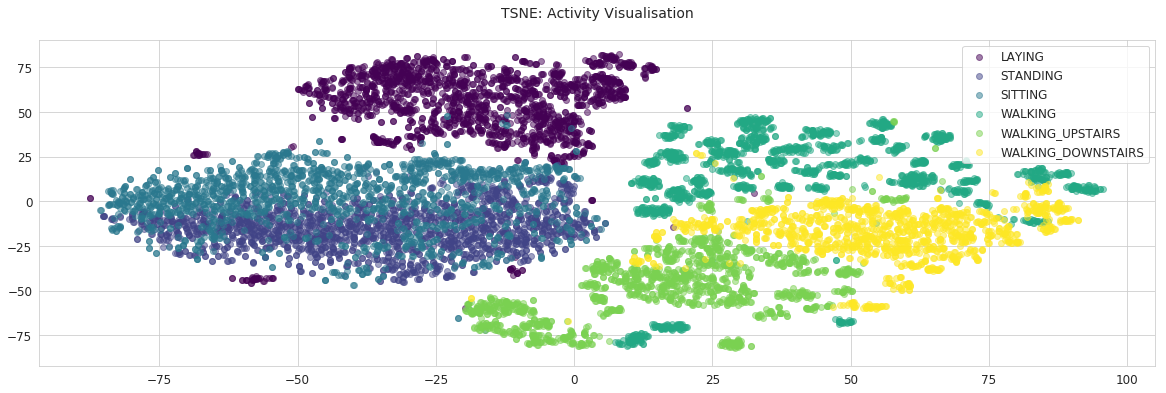

In [25]:
# Create subplots
#fig, axarr = plt.subplots(2, 1, figsize=(15,10))
plt.figure(figsize=(20,6))
### Plot Activities
# Get colors
n = label.unique().shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Plot each activity
for i, group in enumerate(label_counts.index):
    # Mask to separate sets
    mask = (label==group).values
    plt.scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)
plt.title('TSNE: Activity Visualisation\n', fontsize=14)
plt.legend()
plt.show()


#### Observation :
- From above plot, we can clearly see the __activities are mostly separable__.

### 3.6. Participant Exploration

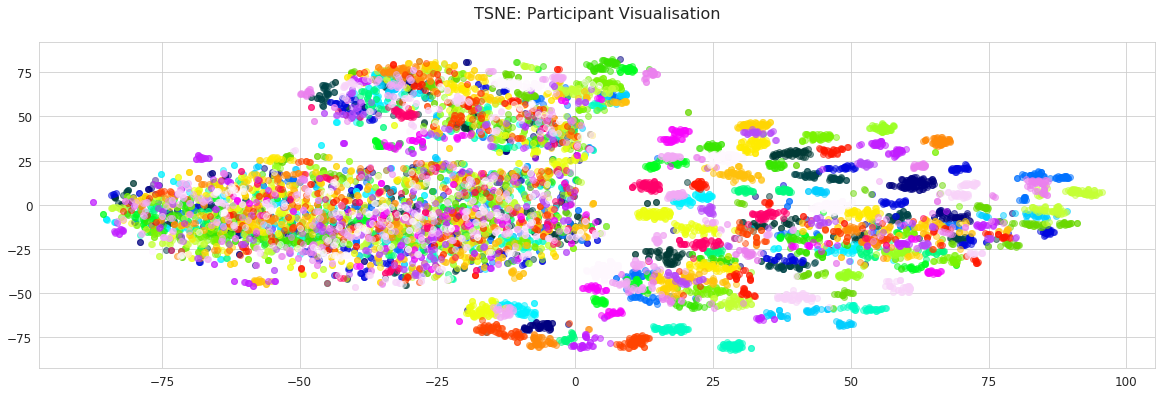

In [26]:
### Plot Subjects
plt.figure(figsize=(20,6))

# Get colors
n = subject_data.unique().shape[0]
colormap = get_cmap('gist_ncar')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Plot each participant
for i, group in enumerate(subject_data.unique()):
    # Mask to separate sets
    mask = (subject_data==group).values
    plt.scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)

plt.title('TSNE: Participant Visualisation\n', fontsize=16)
plt.show()

#### Observation:

- Here plot reveals personal information of the participants. 
- Everybody has for example an __unique/separable walking style__ (on the upper right). <br/>Therefore the smartphone should be able to __detect what you are doing and also who is using the smartphone__ (if you are moving around with it).

#### 3.6.1. How Long Does The Participant Walk?

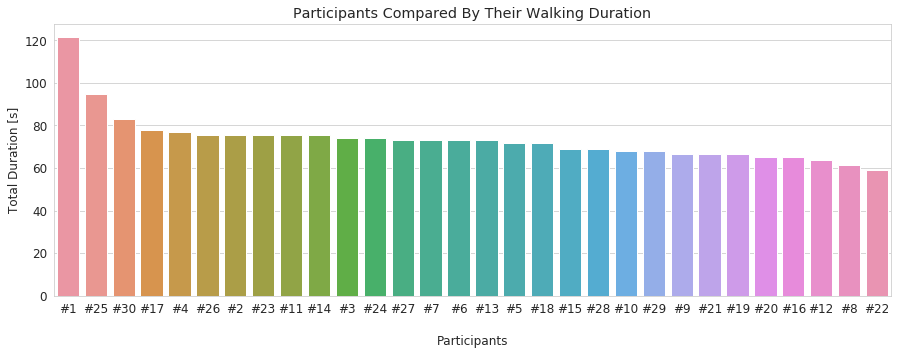

In [27]:
# Group the data by participant and compute total duration of walking
mask = label=='WALKING'
duration_df = (HAR_df[mask].groupby('subject')['Data'].count() * 1.28)

# Create plot
plot_data = duration_df.reset_index().sort_values('Data', ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(data=plot_data, x='subject', y='Data')
plt.title('Participants Compared By Their Walking Duration')
plt.xlabel('\nParticipants')
plt.ylabel('Total Duration [s]')
plt.show()

#### Observations:
- Since the duration of each participant walking is distributed over a range, I assume the participants had a __fixed walking distance for their experiment__ rather than a fixed duration.

#### 3.6.2. How Long Does The Participant Use The Staircase?

Since the dataset has been created in an scientific environment nearly equal preconditions for the participants can be assumed. <br>It is highly likely for the participants to have been walking up and down the same number of staircases.<br> Let us investigate their activity durations.

In [28]:
# Group the data by participant and compute total duration of staircase walking
mask = label.isin(['WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS'])
duration_df = (HAR_df[mask].groupby([label[mask], 'subject'])['Data'].count() * 1.28)

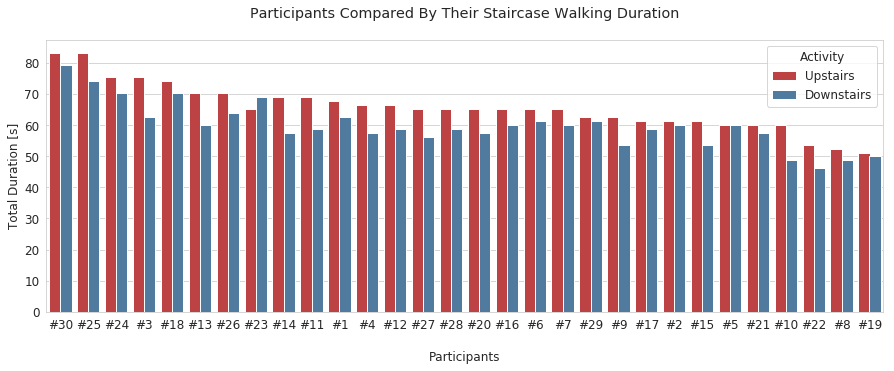

In [29]:
# Create plot
plot_data = duration_df.reset_index().sort_values('Data', ascending=False)
plot_data['Activity'] = plot_data['Activity'].map({'WALKING_UPSTAIRS':'Upstairs', 'WALKING_DOWNSTAIRS':'Downstairs'})

plt.figure(figsize=(15,5))
sns.barplot(data=plot_data, x='subject', y='Data', hue='Activity')
plt.title('Participants Compared By Their Staircase Walking Duration\n')
plt.xlabel('\nParticipants')
plt.ylabel('Total Duration [s]')
plt.show()

#### Observations :
- Nearly all participants have more data for walking upstairs than downstairs. Assuming an equal number of up- and down-walks __the participants need longer walking upstairs__.
- Furthermore, the range of the duration is narrow and adjusted to the conditions. 
- A young person being ~50% fast in walking upstairs than an older one is reasonable.

#### 3.6.3. How Much Does The Up-/Downstairs Ratio Vary?

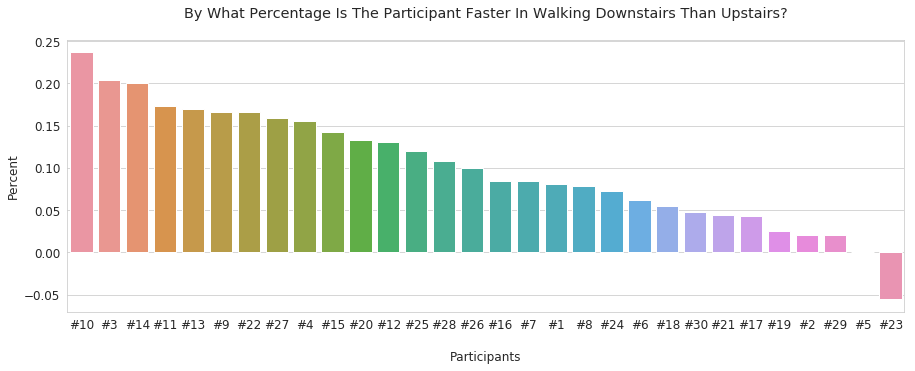

In [30]:
# Create data and plot
plt.figure(figsize=(15,5))
plot_data = ((duration_df.loc['WALKING_UPSTAIRS'] / duration_df.loc['WALKING_DOWNSTAIRS']) -1).sort_values(ascending=False)
sns.barplot(x=plot_data.index, y=plot_data)
plt.title('By What Percentage Is The Participant Faster In Walking Downstairs Than Upstairs?\n')
plt.xlabel('\nParticipants')
plt.ylabel('Percent')
plt.show()

#### Observations :
- There is a wide range in between the participants for their __ratio of up-/down-walking__.
- Since this represents their physical condition, I can imagine __a correlation to their age and health (speculative)__.

### 4. EDA Conclusions :

- __The activities are mostly separable__.
- Everybody has for example __an unique/separable walking style__. <br/>
Therefore the smartphone should be able to __detect what you are doing and also who is using the smartphone__ (if you are moving around with it).
- The __participants__ had a __fixed walking distance for their experiment__ rather than a fixed duration.
- The __participants need longer walking upstairs__.
- __A young person__ being __~50% fast in walking upstairs__ than an older one is reasonable.
- Due to the physical condition of the participants in __correlation to their age and health(speculative)__, there is a __wide range__ in between the participants for their __ratio of up-/down-walking__.


### 5. Model Building & Evaluation

In [31]:
train = pd.read_csv('HAR/train.csv')
test = pd.read_csv('HAR/test.csv')

In [32]:
train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,Data
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING,Train
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING,Train
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING,Train
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING,Train
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING,Train


In [33]:
# get X_train and y_train from csv files
X_train = train.drop(['subject', 'Activity','Data'], axis=1)
y_train = train.Activity

In [34]:
# get X_test and y_test from test csv file
X_test = test.drop(['subject', 'Activity','Data'], axis=1)
y_test = test.Activity

In [35]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


__Labels that are useful in plotting confusion matrix__

In [36]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

__Function to plot the confusion matrix__

In [37]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

__Generic function to run any model specified__(baseline model)

In [38]:
from datetime import datetime

def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, print_cm=True, cm_cmap=plt.cm.Greens):
    # to store results at various phases
    results = dict()
    # time at which model starts training 
    train_start_time = datetime.now()
    print('Training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('Training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data...')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   
    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {: .4f}\n\n'.format(accuracy))

    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results


__Method to print the gridsearch Attributes__

In [39]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal number of Cross Validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{: .4f}\n'.format(model.best_score_))

####  5.1. Logistic Regression with Grid Search

In [40]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

Training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  2.1min finished


Done 
 

Training_time(HH:MM:SS.ms) - 0:02:18.974949


Predicting test data...
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.007001


---------------------
|      Accuracy      |
---------------------

     0.9627


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  2 428  57   0   0   4]
 [  0  12 519   1   0   0]
 [  0   0   0 495   1   0]
 [  0   0   0   3 409   8]
 [  0   0   0  22   0 449]]


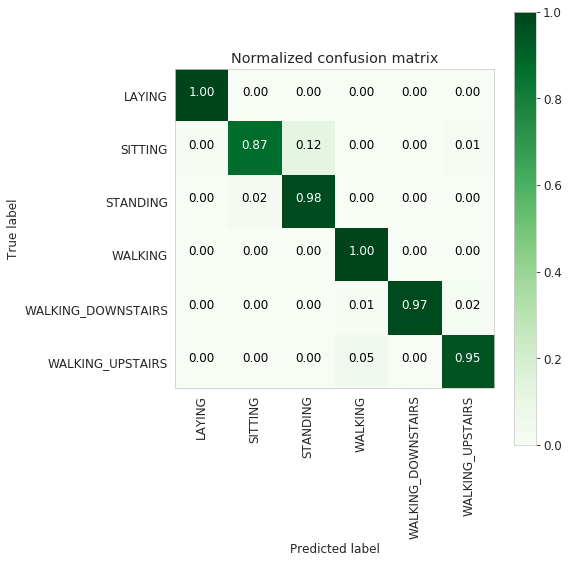

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.95      1.00      0.97       496
WALKING_DOWNSTAIRS       1.00      0.97      0.99       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

       avg / total       0.96      0.96      0.96      2947

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=30, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Paramete

In [41]:
# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

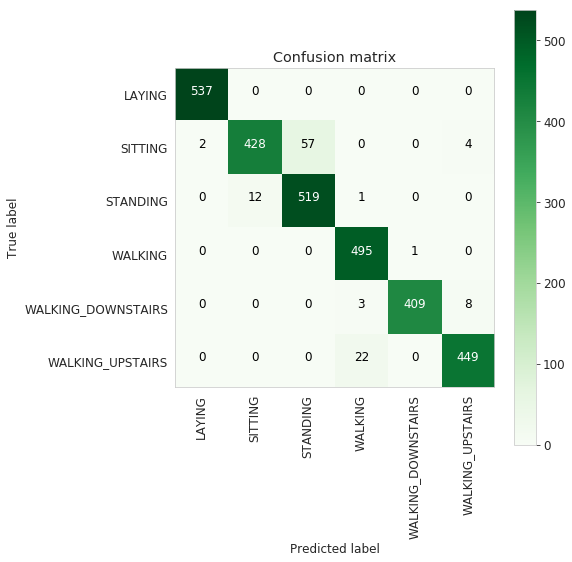

In [42]:
#Confusion matrix plot

plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

####  5.2. Linear SVC with GridSearch

In [43]:
from sklearn.svm import LinearSVC

Training the model..
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   49.9s finished


Done 
 

Training_time(HH:MM:SS.ms) - 0:00:57.199271


Predicting test data...
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.007001


---------------------
|      Accuracy      |
---------------------

     0.9637


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  2 416  68   0   0   5]
 [  0   9 522   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   2 413   5]
 [  0   0   0  14   1 456]]


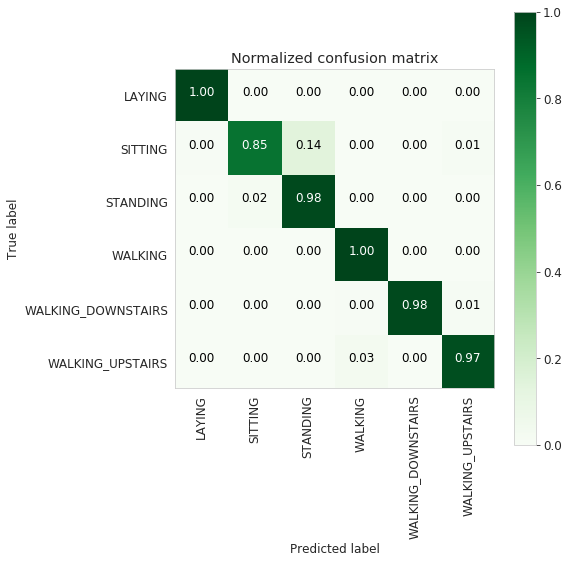

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.85      0.91       491
          STANDING       0.88      0.98      0.93       532
           WALKING       0.97      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.97      0.97       471

       avg / total       0.97      0.96      0.96      2947

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=2, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
     verbose=0)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 2}

----------------

In [44]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(lr_svc_grid_results['model'])

####  5.3. Kernel SVM with GridSearch

Training the model..
Done 
 

Training_time(HH:MM:SS.ms) - 0:08:03.942680


Predicting test data...
Done 
 

testing time(HH:MM:SS:ms) - 0:00:02.642151


---------------------
|      Accuracy      |
---------------------

     0.9627


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


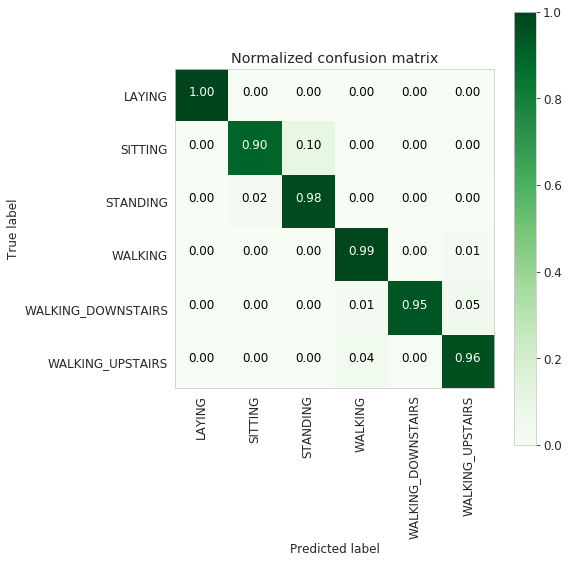

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

       avg / total       0.96      0.96      0.96      2947

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=16, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0078125, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 16, '

In [45]:
from sklearn.svm import SVC

parameters = {'C':[2,8,16],'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(rbf_svm_grid_results['model'])

#### 5.4. Decision Trees with GridSearchCV

Training the model..
Done 
 

Training_time(HH:MM:SS.ms) - 0:00:15.658896


Predicting test data...
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.007000


---------------------
|      Accuracy      |
---------------------

     0.8663


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 390 101   0   0   0]
 [  0  93 439   0   0   0]
 [  0   0   0 471  17   8]
 [  0   0   0  12 347  61]
 [  0   0   0  78  24 369]]


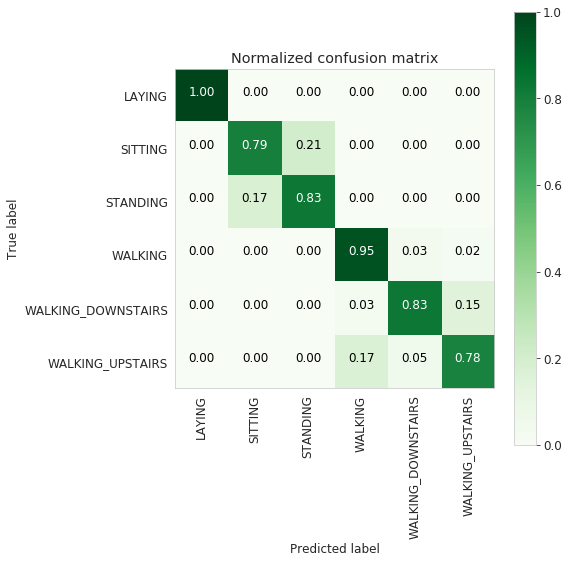

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.81      0.79      0.80       491
          STANDING       0.81      0.83      0.82       532
           WALKING       0.84      0.95      0.89       496
WALKING_DOWNSTAIRS       0.89      0.83      0.86       420
  WALKING_UPSTAIRS       0.84      0.78      0.81       471

       avg / total       0.87      0.87      0.87      2947

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

--------

In [46]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(dt_grid_results['model'])

#### <a id=section505> 5.5. Random Forest Classifier with GridSearch

Training the model..
Done 
 

Training_time(HH:MM:SS.ms) - 0:07:28.085629


Predicting test data...
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.032002


---------------------
|      Accuracy      |
---------------------

     0.9145


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 428  63   0   0   0]
 [  0  46 486   0   0   0]
 [  0   0   0 482  11   3]
 [  0   0   0  36 337  47]
 [  0   0   0  40   6 425]]


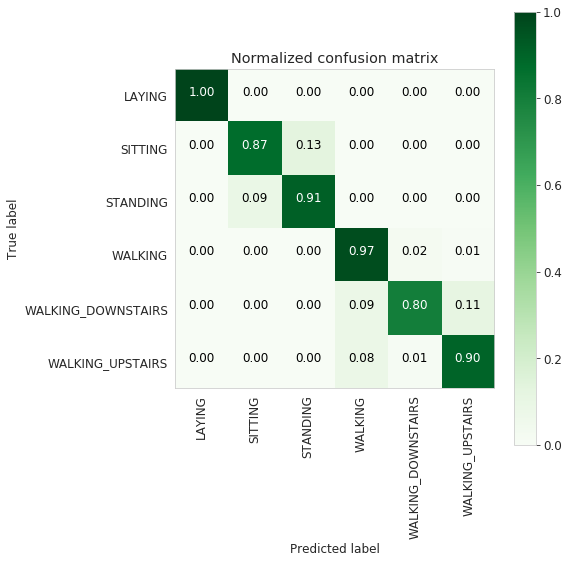

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.90      0.87      0.89       491
          STANDING       0.89      0.91      0.90       532
           WALKING       0.86      0.97      0.91       496
WALKING_DOWNSTAIRS       0.95      0.80      0.87       420
  WALKING_UPSTAIRS       0.89      0.90      0.90       471

       avg / total       0.92      0.91      0.91      2947

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False

In [47]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model
print_grid_search_attributes(rfc_grid_results['model'])

### 6. LGBM Classifier

In [48]:
enc = LabelEncoder()
label_encoded = enc.fit_transform(label)
X_train, X_test, y_train, y_test = train_test_split(tsne_data, label_encoded, random_state=3)

# Create the model
lgbm = LGBMClassifier(n_estimators=400, random_state=3)
lgbm = lgbm.fit(X_train, y_train)

# Test the model
score = accuracy_score(y_true=y_test, y_pred=lgbm.predict(X_test))
print('Accuracy :\t{:.4f}\n'.format(score))

Accuracy :	0.9550



###  6. Model Comparision

In [52]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04} %      {:.04} % '.format(log_reg_grid_results['accuracy'] * 100, 100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04} %      {:.04} % '.format(lr_svc_grid_results['accuracy'] * 100, 100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04} %      {:.04} % '.format(rbf_svm_grid_results['accuracy'] * 100, 100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04} %      {:.04} % '.format(dt_grid_results['accuracy'] * 100, 100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04} %      {:.04} % '.format(rfc_grid_results['accuracy'] * 100, 100-(rfc_grid_results['accuracy'] * 100)))

print('LGBM Classifier     : {:.04} %  '.format(score * 100))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 96.27 %      3.733 % 
Linear SVC          : 96.37 %      3.631 % 
rbf SVM classifier  : 96.27 %      3.733 % 
DecisionTree        : 86.63 %      13.37 % 
Random Forest       : 91.45 %      8.551 % 
LGBM Classifier     : 95.5 %  


In [53]:
accuracy = np.zeros(6)
accuracy [0] = log_reg_grid_results['accuracy'] * 100
accuracy[1] = lr_svc_grid_results['accuracy'] * 100
accuracy[2] = rbf_svm_grid_results['accuracy'] * 100
accuracy[3] = dt_grid_results['accuracy'] * 100
accuracy[4] = rfc_grid_results['accuracy'] * 100
accuracy[5] = score * 100


Let's visualize the accuracies with plot.

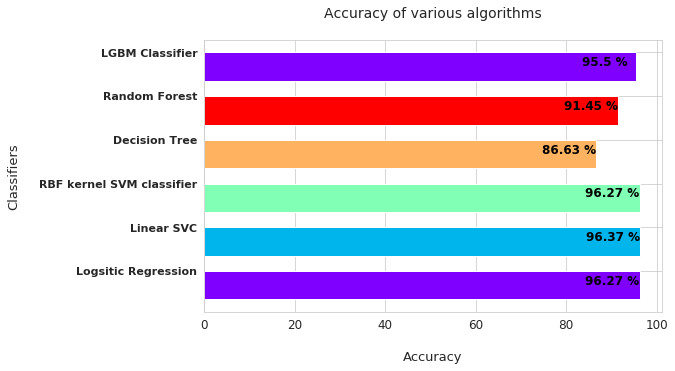

In [59]:
fig, ax = plt.subplots(figsize=(8.2, 5)) 
colors = cm.rainbow(np.linspace(0, 1, 5))
labels = ['Logsitic Regression', 'Linear SVC','RBF kernel SVM classifier','Decision Tree','Random Forest', 'LGBM Classifier']
accuracy = np.round(accuracy, 2) 


ind = np.arange(len(accuracy))  # the x locations for the groups
width = 0.65 # the width of the bars

ax.set_yticks(ind + width / 2)
ax.set_yticklabels(labels, fontsize=11, fontweight='bold')

ax.barh(ind, accuracy, width, color = colors)
plt.xlabel('\nAccuracy',fontsize=13)
plt.ylabel('Classifiers\n', fontsize=13)
plt.title('Accuracy of various algorithms\n', fontsize=14)

for i, v in enumerate(accuracy):
    ax.text(v - 12, i + 0.02, str(v)+' %', color = 'black', fontweight='bold')